<a href="https://colab.research.google.com/github/gredy/2021Z-DataVisualizationTechniques/blob/master/THE_SMART_CITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

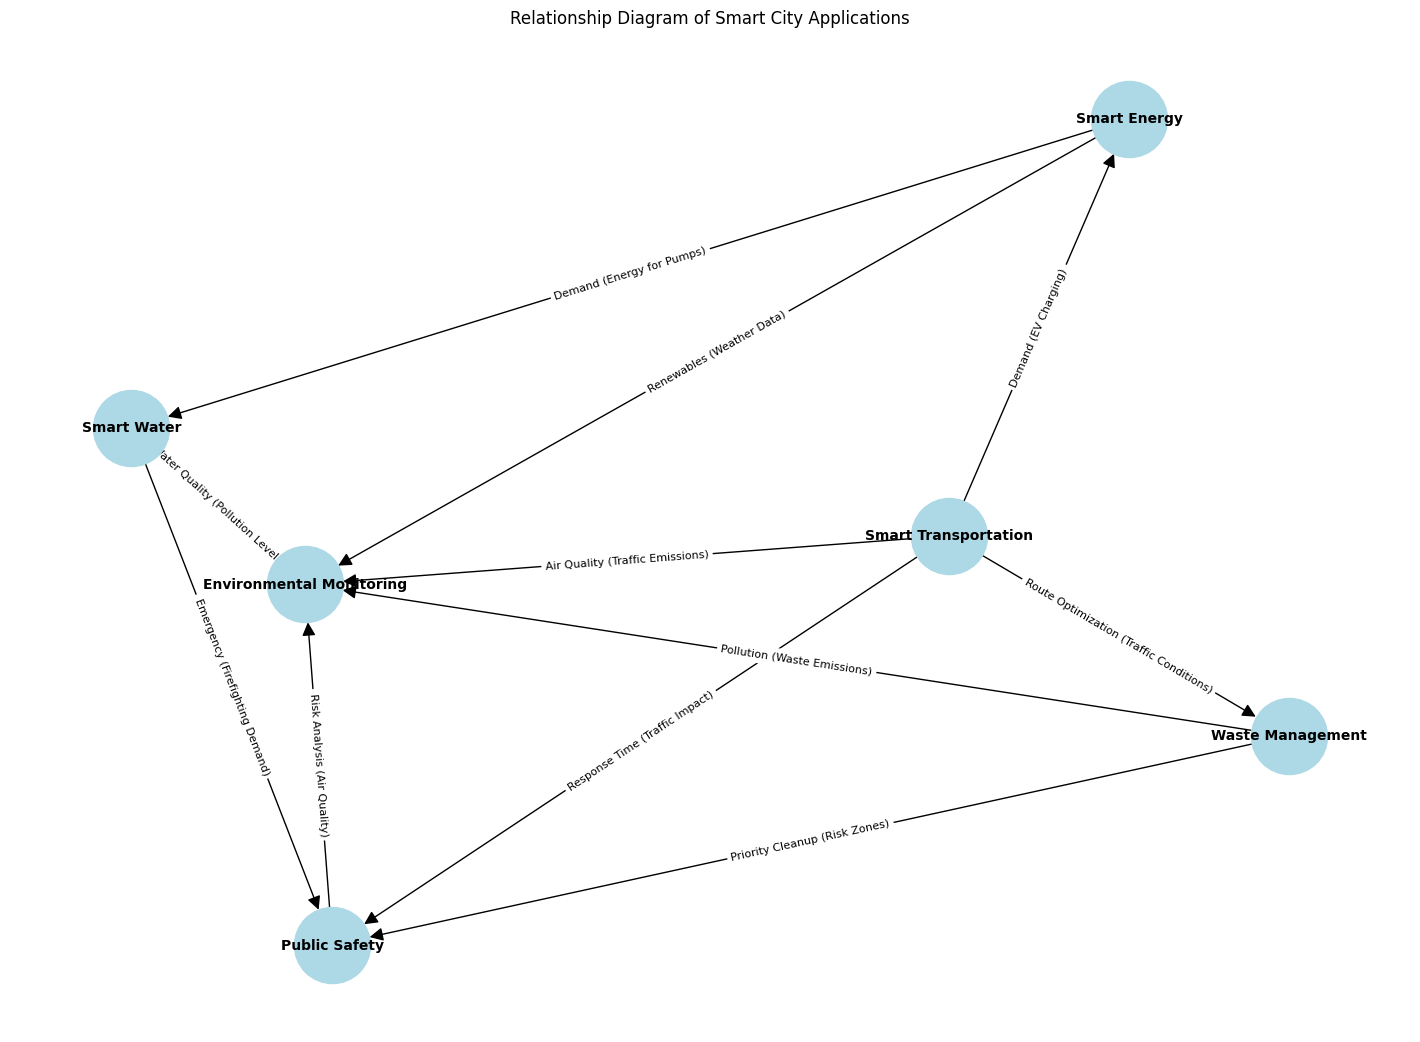

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Define relationships between Smart City applications
relationships = [
    ("Smart Transportation", "Smart Energy", "Demand (EV Charging)"),
    ("Smart Transportation", "Public Safety", "Response Time (Traffic Impact)"),
    ("Smart Transportation", "Environmental Monitoring", "Air Quality (Traffic Emissions)"),
    ("Smart Transportation", "Waste Management", "Route Optimization (Traffic Conditions)"),
    ("Smart Energy", "Environmental Monitoring", "Renewables (Weather Data)"),
    ("Smart Energy", "Smart Water", "Demand (Energy for Pumps)"),
    ("Smart Water", "Public Safety", "Emergency (Firefighting Demand)"),
    ("Smart Water", "Environmental Monitoring", "Water Quality (Pollution Levels)"),
    ("Public Safety", "Environmental Monitoring", "Risk Analysis (Air Quality)"),
    ("Waste Management", "Environmental Monitoring", "Pollution (Waste Emissions)"),
    ("Waste Management", "Public Safety", "Priority Cleanup (Risk Zones)"),
]

# Create a directed graph for the relationship diagram
G = nx.DiGraph()
for source, target, label in relationships:
    G.add_edge(source, target, label=label)

# Draw the relationship diagram
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
edge_labels = {(source, target): label for source, target, label in relationships}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Relationship Diagram of Smart City Applications")
plt.show()


|--- Traffic Conditions <= 0.50
|   |--- Energy Demand (EV) <= 0.50
|   |   |--- class: 0
|   |--- Energy Demand (EV) >  0.50
|   |   |--- class: 0
|--- Traffic Conditions >  0.50
|   |--- Energy Demand (EV) <= 0.50
|   |   |--- class: 0
|   |--- Energy Demand (EV) >  0.50
|   |   |--- class: 1



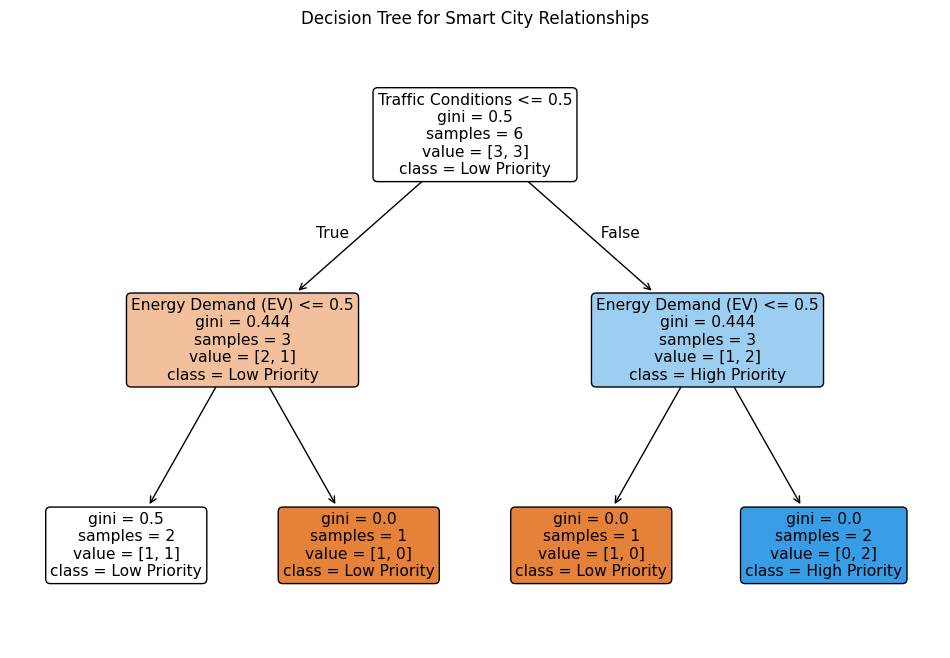

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_text
import pandas as pd
import numpy as np

# Create a simple dataset to simulate decision paths between applications
data = {
    "Traffic Conditions": [1, 1, 0, 0, 1, 0],
    "Energy Demand (EV)": [1, 0, 1, 0, 1, 0],
    "Air Quality Impact": [1, 1, 0, 0, 1, 0],
    "Route Efficiency": [1, 0, 1, 0, 1, 0],
    "Priority Zones": [1, 0, 0, 1, 1, 0],  # Target variable
}
df = pd.DataFrame(data)

# Features and target variable
X = df[["Traffic Conditions", "Energy Demand (EV)", "Air Quality Impact", "Route Efficiency"]]
y = df["Priority Zones"]

# Train a decision tree classifier for visualization
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X, y)

# Visualize the decision tree
decision_tree_text = export_text(clf, feature_names=list(X.columns))
print(decision_tree_text)

# Plotting the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=list(X.columns), class_names=["Low Priority", "High Priority"], filled=True, rounded=True)
plt.title("Decision Tree for Smart City Relationships")
plt.show()


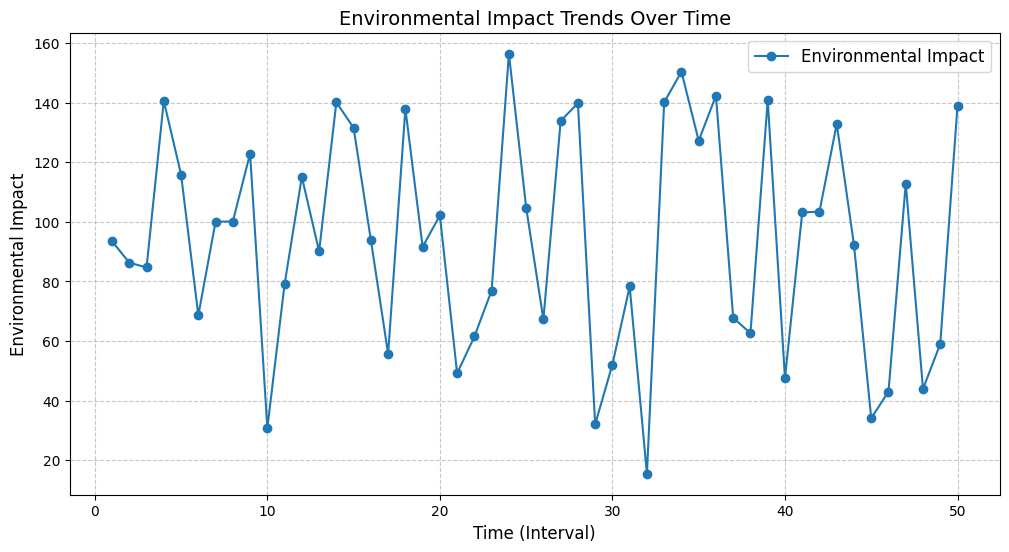

In [7]:
 #! get_ipython().system(' pip install ace_tools==0.0.8')

#import ace_tools as tools

import pandas as pd
import numpy as np

# Generate Synthetic Data for 50 observations for variables in the models
data = {
    "Traffic Conditions": np.random.uniform(0, 1, 50),  # 0 = low congestion, 1 = high congestion
    "Energy Demand (EV)": np.random.uniform(0, 100, 50),  # Energy demand in kWh
    "Air Quality Impact": np.random.uniform(0, 500, 50),  # AQI scale (lower is better)
    "Route Efficiency": np.random.uniform(50, 100, 50),  # Percentage efficiency
    "Water Flow": np.random.uniform(100, 1000, 50),  # Water flow in cubic meters per hour
    "Leakage Rates": np.random.uniform(0, 50, 50),  # Leakage in cubic meters per hour
    "Energy Cost": np.random.uniform(0.1, 0.5, 50),  # Cost in $/kWh
    "Public Safety Risk": np.random.uniform(0, 1, 50),  # 0 = low risk, 1 = high risk
    "Waste Levels": np.random.uniform(0, 100, 50),  # Percentage fill level
    "Pollution Levels": np.random.uniform(0, 300, 50),  # AQI scale
    "Renewable Energy Availability": np.random.uniform(0, 1, 50),  # 0 = low, 1 = high
}

# Convert to DataFrame
srs_data = pd.DataFrame(data)

# Display to user
#import ace_tools as tools; tools.display_dataframe_to_user(name="Synthetic SRS Data for Smart City Models", dataframe=srs_data)
srs_data.head(6)


# Simulating environmental impact based on integrated models
# Environmental impact is a function of pollution levels, energy demand, traffic conditions, and waste levels

# Define weights for each contributing factor to the environmental impact
weights = {
    "Pollution Levels": 0.4,
    "Energy Demand (EV)": 0.3,
    "Traffic Conditions": 0.2,
    "Waste Levels": 0.1,
}

# Calculate Environmental Impact as a weighted sum of the contributing factors
srs_data["Environmental Impact"] = (
    weights["Pollution Levels"] * srs_data["Pollution Levels"] +
    weights["Energy Demand (EV)"] * srs_data["Energy Demand (EV)"] +
    weights["Traffic Conditions"] * srs_data["Traffic Conditions"] * 100 +  # Normalize traffic conditions
    weights["Waste Levels"] * srs_data["Waste Levels"]
)

# Display the updated dataset with simulated Environmental Impact
#tools.display_dataframe_to_user(name="Simulated Environmental Impact from Integrated Models", dataframe=srs_data)


import matplotlib.pyplot as plt

# Simulate time for observations (e.g., 50 time intervals)
srs_data["Time"] = range(1, 51)

# Plot Environmental Impact trends over time
plt.figure(figsize=(12, 6))
plt.plot(srs_data["Time"], srs_data["Environmental Impact"], marker='o', linestyle='-', label="Environmental Impact")
plt.title("Environmental Impact Trends Over Time", fontsize=14)
plt.xlabel("Time (Interval)", fontsize=12)
plt.ylabel("Environmental Impact", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()


The visualization shows the Environmental Impact trends over time based on the integrated models. Peaks and troughs in the impact reflect variations in contributing factors like pollution, energy demand, and traffic conditions. Let me know if further insights or detailed breakdowns are needed! ​

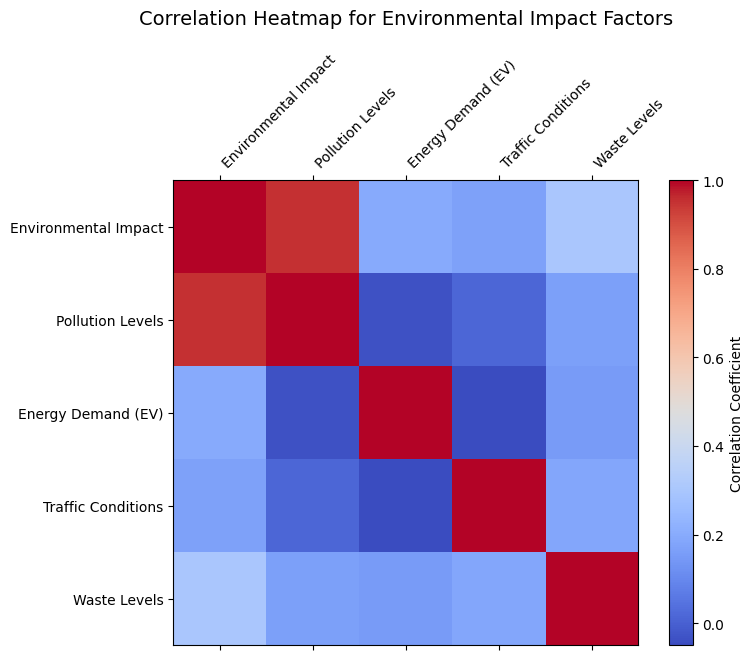

In [9]:
# Select relevant columns for correlation analysis
correlation_factors = srs_data[[
    "Environmental Impact",
    "Pollution Levels",
    "Energy Demand (EV)",
    "Traffic Conditions",
    "Waste Levels"
]]

# Compute correlation matrix
correlation_matrix = correlation_factors.corr()

# Display the correlation matrix
#tools.display_dataframe_to_user(name="Correlation Matrix for Environmental Impact Factors", dataframe=correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='left')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Heatmap for Environmental Impact Factors", pad=20, fontsize=14)
plt.show()


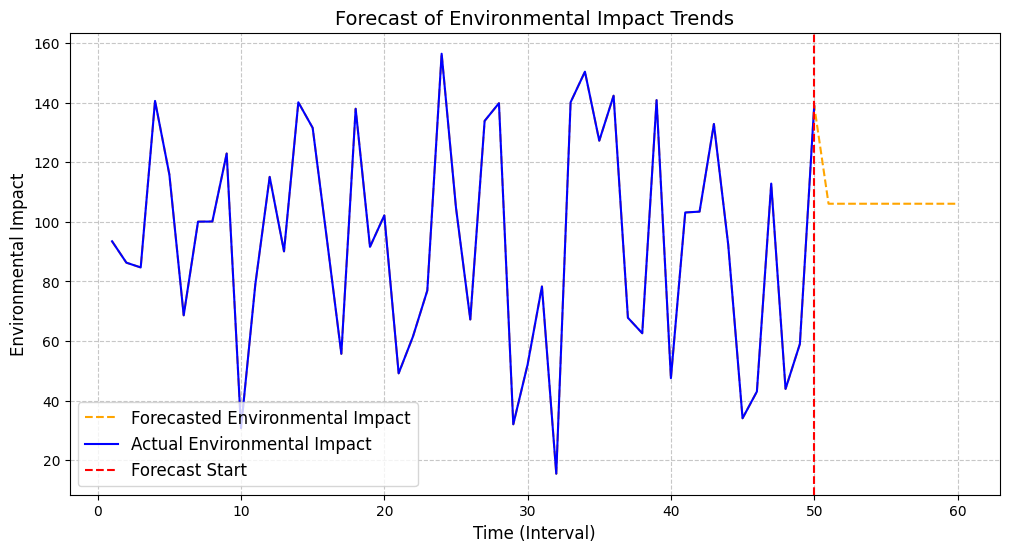

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare data for forecasting
X = srs_data[["Time"]]  # Using time as the independent variable
y = srs_data["Environmental Impact"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor for forecasting
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict future environmental impacts (next 10 time steps)
future_time = pd.DataFrame({"Time": range(51, 61)})
predicted_impact = model.predict(future_time)

# Combine actual and forecasted data for visualization
forecast_data = pd.concat([srs_data, future_time], ignore_index=True)
forecast_data["Forecasted Impact"] = np.concatenate([srs_data["Environmental Impact"], predicted_impact])

# Plot actual and forecasted environmental impact trends
plt.figure(figsize=(12, 6))
plt.plot(forecast_data["Time"], forecast_data["Forecasted Impact"], label="Forecasted Environmental Impact", linestyle='--', color="orange")
plt.plot(srs_data["Time"], srs_data["Environmental Impact"], label="Actual Environmental Impact", color="blue")
plt.axvline(x=50, color="red", linestyle="--", label="Forecast Start")
plt.title("Forecast of Environmental Impact Trends", fontsize=14)
plt.xlabel("Time (Interval)", fontsize=12)
plt.ylabel("Environmental Impact", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
